<h1>🍷Evaluate wine quality using machine learning!</h1>
<p>In this notebook, we will train our models (mostly decision trees and, based on them, ensembles) to classify wines from this
<a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">dataset</a>.
</p>
<p>✅First, let's import unnecessary libraries and load our data.</p>

In [1]:
# for catch and ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries for basic data operatios
import pandas as pd
import numpy as np

In [3]:
# libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# allows to embed graphics inside the Jupiter Notebook
%matplotlib inline

In [294]:
# machine learning libraries
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

<h2>🔍Exploratory Data Analysis</h2>

✅After importing all the necessary libraries, let's do some exploratory data analysis.

In [6]:
data = pd.read_csv('winequality-red.csv')

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


✅Describe, what every feature means!
<ul><b>Features</b>:
    <li><i>fixed acidity</i> - the amount of acids present in wine is fixed or non-volatile (do not evaporate easily).</li>
    <li><i>volatile acidity</i></li> - the amount of acetic acid in the wine, too high a level of which can lead to an unpleasant acetic taste.
    <li><i>citric acid</i> - it is contained in small amounts, citric acid can give wines "freshness" and flavor.</li>
    <li><i>residual sugar - the amount of sugar remaining after fermentation stops. It is rare to find wines with a content of less than 1 gram per liter, and wines with a content of more than 45 grams per liter are considered sweet.</i></li>
    <li><i>chlorides</i> - the amount of salt in the wine.</li>
    <li><i>free sulfur dioxide</i> - the free form of SO2 exists in equilibrium between molecular SO2 (in the form of dissolved gas) and bisulfite ion; prevents microbial growth and oxidation of wine</li>
    <li><i>total sulfur dioxide</i> - the amount of free and bound forms of SO2; at low concentrations of SO2 is mostly not found in wine, but at concentrations of free SO2 of more than 50 ppm, SO2 becomes noticeable in the aroma and taste of wine.</li>
    <li><i>density</i> - the density of water is close to the density of water, depending on the percentage of alcohol and sugar.</li>
    <li><i>pH</i> - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very alkaline); most wines have a pH level from 3 to 4 on the pH scale.</li>
    <li><i>sulphates</i> - a wine additive that can help increase the level of sulfur dioxide (S02), which acts as an antimicrobial and antioxidant agent.</li>
    <li><i>alcohol</i> - the percentage of alcohol content in the wine.</li>
    <li><i>quality</i> - <u>target</u> variable (based on sensory data, score from 0 to 10).</li>
</ul>

✅Let's take a look at the overall statistics for the data. 

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


✅First, what immediately catches the eye is that we have no missing data!
<br>Let's check this ourselves:

In [9]:
data.isnull().any().any()

False

✅And that's right! There are no gaps in our data!<br>
In this case, we'll look at how our target variable is spread out:

In [10]:
target = data['quality']

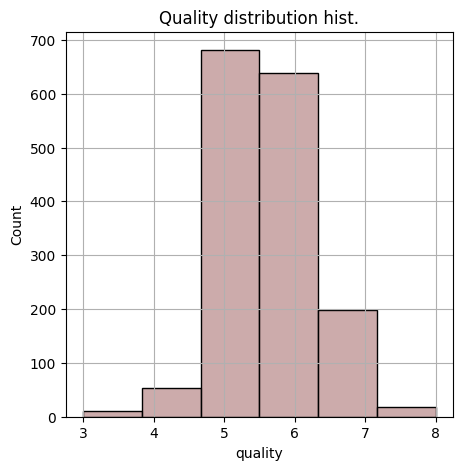

In [11]:
plt.figure(figsize=(5, 5))

plt.grid(True)
sns.histplot(target, bins=6, color='rosybrown')
plt.title('Quality distribution hist.')
plt.show()

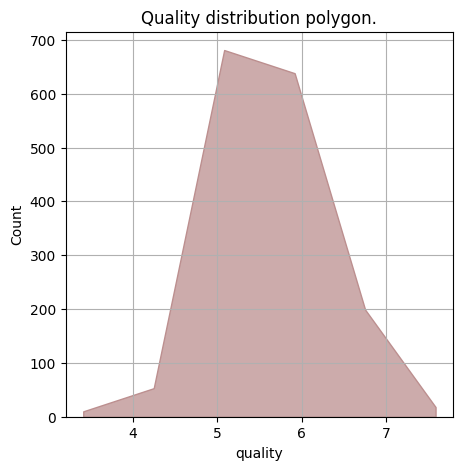

In [12]:
plt.figure(figsize=(5, 5))

plt.grid(True)
sns.histplot(target, bins=6, color='rosybrown', element='poly')
plt.title('Quality distribution polygon.')
plt.show()

✅All right, obviously, the target has no knowledge (at least for me) of distribution.<br>
We can also see that there are a lot of wines with medium quality (5-7, excluding), and very few wines of low (0-3) or high (7-10) quality.<br>
🔍In this case, let's look for anomalies in the target data!

In [13]:
np.unique(target, return_counts = True)

(array([3, 4, 5, 6, 7, 8]), array([ 10,  53, 681, 638, 199,  18]))

✅In the anomaly, we can talk about both bad (quality - 3) and good (rating - 8) wines.<br>
Let's take a look at the percentage comparison for all the data.

In [14]:
print(np.round(data[(data['quality'] == 3) | (data['quality'] == 8)].shape[0] / data.shape[0], 2) * 100, '%', sep='')

2.0%


✅We have a relatively small percentage of anomalies!<br>
Next, we need to find out what the values of the features are for anomalies compared to the rest of the data.

In [15]:
# get indexes of anomalies objects
anom_indexes = data[(data['quality'] == 3) | (data['quality'] == 8)].index
anom_data = data.loc[anom_indexes]
anom_data.index = range(1, anom_data.shape[0] + 1)
rest_data = data.drop(labels = anom_indexes, axis = 0)
rest_data.index = range(1, rest_data.shape[0] + 1)

In [16]:
anom_data.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,24.900000,0.884500
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,33.444444,0.423333


In [17]:
rest_data.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,35.020101,0.403920


✅Okay, we don't have a serious deviation between the anomalies and the rest of the data.<br>
However, for several features, we can assume that they are increasing or decreasing, directly affecting the target value.
Based on pivot tables, we can assume that if the mean values of features are sorted in order of increasing target value and form a monotonically increasing sequence, then we can conclude that this feature has a linear effect on the target value (in the future, we will attempt to prove this).<br>
But now, let's take a look at these features.

In [18]:
# check if feature monotonic or not
def is_monotonic(feature: pd.Series) -> bool:
    return np.all(np.diff(feature) > 0) or np.all(np.diff(feature) < 0)

In [19]:
all_pivoted_data = data.pivot_table(index=['quality'])

In [20]:
linear_features = []

for feature in all_pivoted_data.columns:
    if is_monotonic(all_pivoted_data[feature]):
        linear_features.append(feature)

linear_features

['citric acid', 'sulphates']

✅And also, at the end of EDA, let's take a look at the correlation matrix.

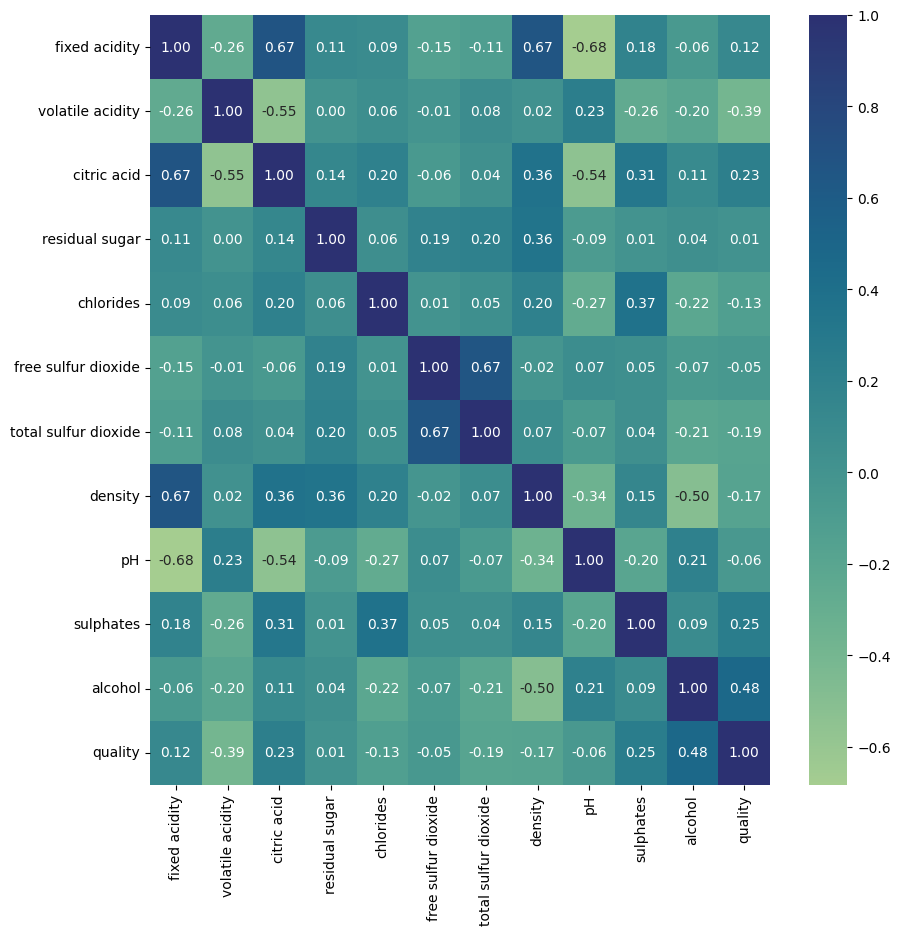

In [21]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = sns.color_palette("crest", as_cmap = True))
plt.show()

✅Good, it seems that we don't have any dependencies in our data!

<h2>⚙️Work with features</h2>

✅In the EDA part, we discovered that a few features might have a stronger impact on the target variable than the rest.<br>
In this section, we attempt to prove this using some feature selection techniques.

In [22]:
# First, we need to separate our target from the rest
y = data['quality']
X = data.drop(columns=['quality'], axis=1)

✅Let's split our data into train and test sets.<br>
We have a class imbalance in the target, so we should use stratification for splitting.

In [23]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(sss.split(X, y))
X_train, y_train = X.loc[train_index], y.loc[train_index]
X_test, y_test = X.loc[test_index], y.loc[test_index]

✅Compare the stratified distribution with the standard "train_test_split" distribution.

In [24]:
X_train_tts, X_test_tts, y_train_tts, y_test_tts = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
vals = {
    'All dataset': target.value_counts() / target.shape[0],
    'Stratify dataset': y_train.value_counts() / y_train.shape[0],
    'Train_test_split dataset': y_train_tts.value_counts() / y_train_tts.shape[0]
}

comp = pd.DataFrame(data=vals)
comp

,All dataset,Stratify dataset,Train_test_split dataset
quality,,,
5,0.425891,0.426273,0.434316
6,0.398999,0.398570,0.391421
7,0.124453,0.124218,0.123324
4,0.033146,0.033065,0.032172
8,0.011257,0.011618,0.010724
3,0.006254,0.006256,0.008043


In [26]:
# Note, that the same as startification result can be achived via train_test_split as shown below
# train_test_split(X, y, test_size=0.3, random_state=42, stratify=target)

✅And, of course, scale all our data.

In [27]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = pd.DataFrame(data=X_train, columns=[data.drop(['quality'], axis=1).columns])
X_test = pd.DataFrame(data=X_test, columns=[data.drop(['quality'], axis=1).columns])

✅Start by wrapper methods - look for 3 less informative features and 3 more informative ones.

In [28]:
# looking for 3 less informative features
features = list(X_train.columns)
linear_less_important_features = []

for i in range(3):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    weighted_features = pd.DataFrame(data=model.coef_, index=features, columns=['Weight']).apply(abs)
    weighted_features.sort_values(by=['Weight'], ascending=False, inplace=True)
    linear_less_important_features.append(weighted_features.index[-1][0])
    features = weighted_features.index[:-1]

In [29]:
linear_less_important_features

['residual sugar', 'fixed acidity', 'density']

In [30]:
# looking for 3 more informative features
features = list(X_train.columns)
linear_more_important_features = []

for i in range(3):
    model = LinearRegression()
    model.fit(X_train[features], y_train)
    weighted_features = pd.DataFrame(data=model.coef_, index=features, columns=['Weight']).apply(abs)
    weighted_features.sort_values(by=['Weight'], ascending=True, inplace=True)
    linear_more_important_features.append(weighted_features.index[-1][0])
    features = weighted_features.index[:-1]

In [31]:
linear_more_important_features

['alcohol', 'density', 'total sulfur dioxide']

✅And now repeat it for Decision Tree Regression.

In [32]:
# looking for 3 less informative features
features = list(X_train.columns)
tree_less_important_features = []

for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[features], y_train)
    weighted_features = pd.DataFrame(data=model.feature_importances_, index=features, columns=['Weight']).apply(abs)
    weighted_features.sort_values(by=['Weight'], ascending=False, inplace=True)
    tree_less_important_features.append(weighted_features.index[-1][0])
    features = weighted_features.index[:-1]

In [33]:
tree_less_important_features

['citric acid', 'total sulfur dioxide', 'residual sugar']

In [34]:
# looking for 3 more informative features
features = list(X_train.columns)
tree_more_important_features = []

for i in range(3):
    model = DecisionTreeRegressor()
    model.fit(X_train[features], y_train)
    weighted_features = pd.DataFrame(data=model.feature_importances_, index=features, columns=['Weight']).apply(abs)
    weighted_features.sort_values(by=['Weight'], ascending=True, inplace=True)
    tree_more_important_features.append(weighted_features.index[-1][0])
    features = weighted_features.index[:-1]

In [35]:
tree_more_important_features

['alcohol', 'sulphates', 'volatile acidity']

✅Okay, we can see similar results for linear and tree models. Let's try this approach in the opposite order.<br>
Instead of weight or feature importance, we will use the root mean square error (RMSE) score.

In [36]:
linear_features = {}

for feature in X_train.columns:
    model = LinearRegression()
    model.fit(pd.DataFrame(X_train[feature]), y_train)
    linear_features[feature[0]] = root_mean_squared_error(y_test, model.predict(pd.DataFrame(X_test[feature])))

In [37]:
linear_features = pd.DataFrame(data=linear_features.values(), index=linear_features.keys(), columns=['Feature weight'])
linear_features.sort_values(by=['Feature weight'], ascending=True, inplace=True)
linear_features

,Feature weight
alcohol,0.715650
volatile acidity,0.732666
sulphates,0.765141
citric acid,0.773312
total sulfur dioxide,0.794723
fixed acidity,0.794973
density,0.797298
chlorides,0.800143
pH,0.803076
free sulfur dioxide,0.803606


In [38]:
tree_features = {}

for feature in X_train.columns:
    model = DecisionTreeRegressor()
    model.fit(pd.DataFrame(X_train[feature]), y_train)
    tree_features[feature[0]] = root_mean_squared_error(y_test, model.predict(pd.DataFrame(X_test[feature])))

In [39]:
tree_features = pd.DataFrame(data=tree_features.values(), index=tree_features.keys(), columns=['Feature weight'])
tree_features.sort_values(by=['Feature weight'], ascending=True, inplace=True)
tree_features

,Feature weight
citric acid,0.783811
sulphates,0.784938
alcohol,0.785568
free sulfur dioxide,0.813401
fixed acidity,0.824665
total sulfur dioxide,0.834673
pH,0.846055
volatile acidity,0.855322
chlorides,0.856395
residual sugar,1.030907


✅And another good idea for feature selection is to use L1 regression to see if some features are excluded.

🏋️But let's first define the hyperparameters for our model.

In [40]:
params = {
    'alpha': np.linspace(-1, 1),
    'max_iter': [100, 500, 1000, 2000, 2500, 4000, 5000],
    'selection': ['cyclic', 'random']
}

l1_search = GridSearchCV(Lasso(), params)
l1_search.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]),
                         'max_iter': [100, 500, 1000, 2000, 2500, 4000, 5000],
                         'selection': ['cyclic', 'random']})

In [41]:
# look on rmse
root_mean_squared_error(l1_search.predict(X_test), y_test)

0.6369349366408217

In [42]:
# Look on our L1 regression with best params and see on feature weights
lasso = l1_search.best_estimator_
pd.DataFrame(data=lasso.coef_, index=X_train.columns, columns=['feature weight'])

,feature weight
fixed acidity,0.000000
volatile acidity,-0.177576
citric acid,-0.000000
residual sugar,0.000000
chlorides,-0.054357
free sulfur dioxide,0.000580
total sulfur dioxide,-0.063222
density,-0.000000
pH,-0.036559
sulphates,0.101522


✅Well, we can see that the most useless feature is:
<ul>
    <li>residual sugar</li>
    <li>free sulfur dioxide</li>
    <li>citric acid</li>
</ul>

<h2>🤖Training models!</h2>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['quality'], axis=1), target,
    test_size=0.3, random_state=42,
    stratify=target
)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = pd.DataFrame(data=X_train, columns=[data.drop(['quality'], axis=1).columns])
X_test = pd.DataFrame(data=X_test, columns=[data.drop(['quality'], axis=1).columns])

In [44]:
# start from one tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
root_mean_squared_error(y_test, tree.predict(X_test))

0.8266397845091497

In [45]:
tree.score(X_test, y_test)

-0.053991631799162665

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    data.drop(['quality', 'residual sugar', 'free sulfur dioxide', 'citric acid'], axis=1), target,
    test_size=0.3, random_state=42,
    stratify=target
)

X_train1 = StandardScaler().fit_transform(X_train1)
X_test1 = StandardScaler().fit_transform(X_test1)

X_train1 = pd.DataFrame(data=X_train1, columns=[data.drop(['quality', 'residual sugar', 'free sulfur dioxide', 'citric acid'], axis=1).columns])
X_test1 = pd.DataFrame(data=X_test1, columns=[data.drop(['quality', 'residual sugar', 'free sulfur dioxide', 'citric acid'], axis=1).columns])

In [47]:
tree1 = DecisionTreeRegressor(random_state=42)
tree1.fit(X_train1, y_train1)
root_mean_squared_error(y_test1, tree1.predict(X_test1))

0.832916562447884

In [48]:
tree1.score(X_test1, y_test1)

-0.0700585774058573

✅Try to find the best possible hyperparameters.

In [49]:
#first find best depth
depth = np.arange(1, 31)
metric_result = []
optimal_level = None
optimal_val = float('inf')

for level in depth:
    model = DecisionTreeRegressor(max_depth=level, random_state=42)
    model.fit(X_train, y_train)
    metric = root_mean_squared_error(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric < optimal_val:
        optimal_val = metric
        optimal_level = level

In [50]:
# set style for our rest graphics
plt.style.use('ggplot')

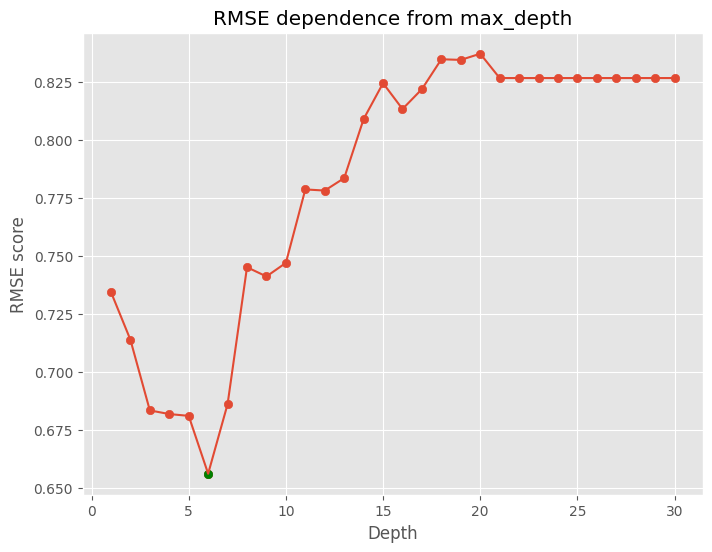

In [51]:
plt.figure(figsize=(8, 6))

plt.plot(depth, metric_result)
plt.scatter(depth, metric_result)
plt.scatter(optimal_level, optimal_val, color='green')

plt.xlabel('Depth')
plt.ylabel('RMSE score')
plt.title('RMSE dependence from max_depth')
plt.grid(True)
plt.show()

In [52]:
optimal_level

6

In [53]:
# continue with max_leafs
leafs = np.arange(2, 51)
metric_result = []
optimal_leafs = None
optimal_val = float('inf')

for leaf in leafs:
    model = DecisionTreeRegressor(max_leaf_nodes=leaf, random_state=42)
    model.fit(X_train, y_train)
    metric = root_mean_squared_error(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric < optimal_val:
        optimal_val = metric
        optimal_leafs = leaf

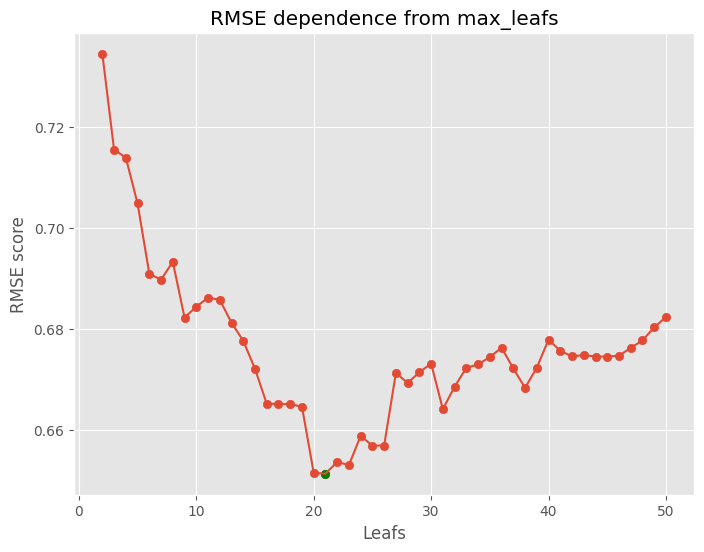

In [54]:
plt.figure(figsize=(8, 6))

plt.plot(leafs, metric_result)
plt.scatter(leafs, metric_result)
plt.scatter(optimal_leafs, optimal_val, color='green')

plt.xlabel('Leafs')
plt.ylabel('RMSE score')
plt.title('RMSE dependence from max_leafs')
plt.grid(True)
plt.show()

In [55]:
optimal_leafs

21

✅Wel... Let's try GridSearchCV.

In [56]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 11),
    'max_leaf_nodes': np.arange(2, 22, 2)
}

tree_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params)
tree_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'splitter': ['best', 'random']})

✅Combine our results.

In [57]:
tree = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=21, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)
root_mean_squared_error(y_test, tree.predict(X_test))

0.6678216926856523

In [58]:
tree.score(X_test, y_test)

0.31209953897077536

✅Time for heavy weapon - try Random Forest.

In [59]:
# find best estimators
estimators_count = np.arange(1, 410, 10)
metric_result = []
optimal_estimators_count = None
optimal_val = float('inf')

for estimators in estimators_count:
    model = RandomForestRegressor(n_estimators=estimators, max_depth=6, max_leaf_nodes=21, min_samples_leaf=10, random_state=42)
    model.fit(X_train, y_train)
    metric = root_mean_squared_error(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric < optimal_val:
        optimal_val = metric
        optimal_estimators_count = estimators

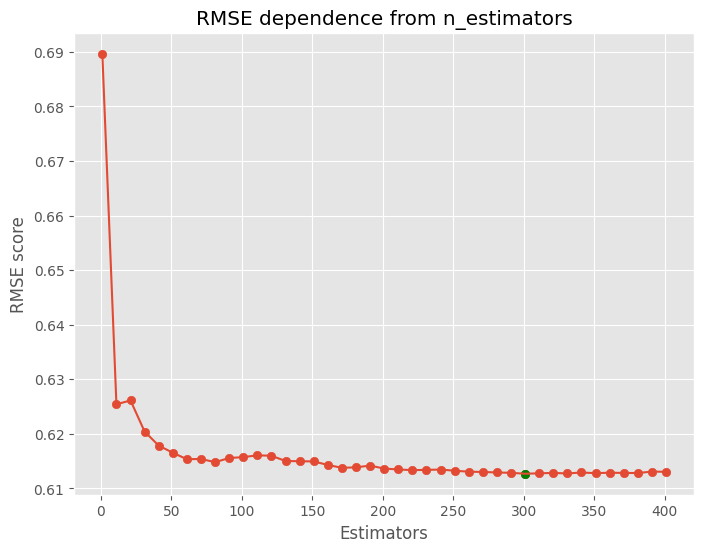

In [60]:
plt.figure(figsize=(8, 6))

plt.plot(estimators_count, metric_result)
plt.scatter(estimators_count, metric_result)
plt.scatter(optimal_estimators_count, optimal_val, color='green')

plt.xlabel('Estimators')
plt.ylabel('RMSE score')
plt.title('RMSE dependence from n_estimators')
plt.grid(True)
plt.show()

In [61]:
optimal_estimators_count

301

In [62]:
forest = RandomForestRegressor(n_estimators=301, max_depth=6, max_leaf_nodes=21, min_samples_leaf=10, random_state=42)
forest.fit(X_train, y_train)
root_mean_squared_error(y_test, forest.predict(X_test))

0.6126998756539539

In [63]:
forest.score(X_test, y_test)

0.4209712327423213

<h2>💡Solve classification task!</h2>

🤪Okay, we've had a setback with regression. Let's try classifying wines as good or bad.<br>
And first, let's find the best threshold to separate good wine from bad wine.

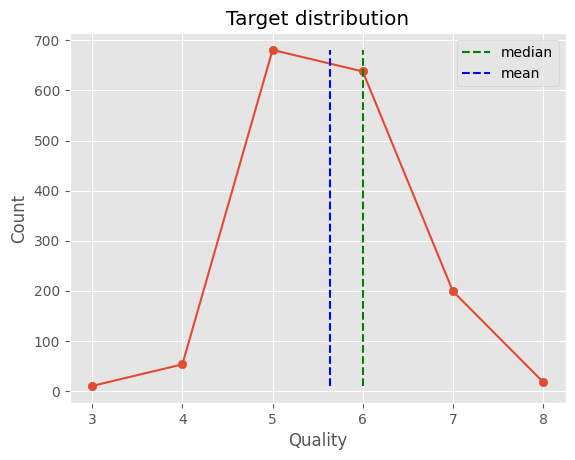

In [64]:
x, y = np.unique(target, return_counts=True)

plt.plot(x, y)
plt.scatter(x, y)
plt.vlines(target.median(), ymin=min(y), ymax=max(y), color='green', linestyle='--', label='median')
plt.vlines(target.mean(), ymin=min(y), ymax=max(y), color='blue', linestyle='--', label='mean')

plt.title('Target distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend()
plt.show()

✅We will consider wine to be good if its quality is above 6, and bad if it is below that level.

In [86]:
data_clf = data.copy()
target = data_clf['quality']
data_clf.drop(['quality'], axis=1, inplace=True)
target[target < 7], target[target >= 7] = 0, 1

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    data_clf, target,
    test_size=0.3, random_state=42,
    stratify=target
)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

X_train = pd.DataFrame(data=X_train, columns=[data_clf.columns])
X_test = pd.DataFrame(data=X_test, columns=[data_clf.columns])

✅Find best parameters for our base model.

In [158]:
params = {
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 11),
    'max_leaf_nodes': np.arange(2, 22, 2)
}

tree_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, scoring='roc_auc')
tree_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [207]:
tree = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=34, min_samples_leaf=6,
                       random_state=42, splitter='best', criterion='entropy', min_samples_split=8)
tree.fit(X_train, y_train)
roc_auc_score(y_test, tree.predict(X_test))

0.7350324374420759

In [241]:
# try to find better max_leafs param
leafs = np.arange(2, 51)
metric_result = []
optimal_leafs = None
optimal_val = -float('inf')

for leaf in leafs:
    # model = DecisionTreeClassifier(max_leaf_nodes=leaf, max_depth=9, min_samples_leaf=7,
    #                    random_state=42, splitter='best', criterion='entropy', min_samples_split=8)
    model = DecisionTreeClassifier(max_leaf_nodes=leaf, random_state=42)
    model.fit(X_train, y_train)
    metric = roc_auc_score(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric > optimal_val:
        optimal_val = metric
        optimal_leafs = leaf

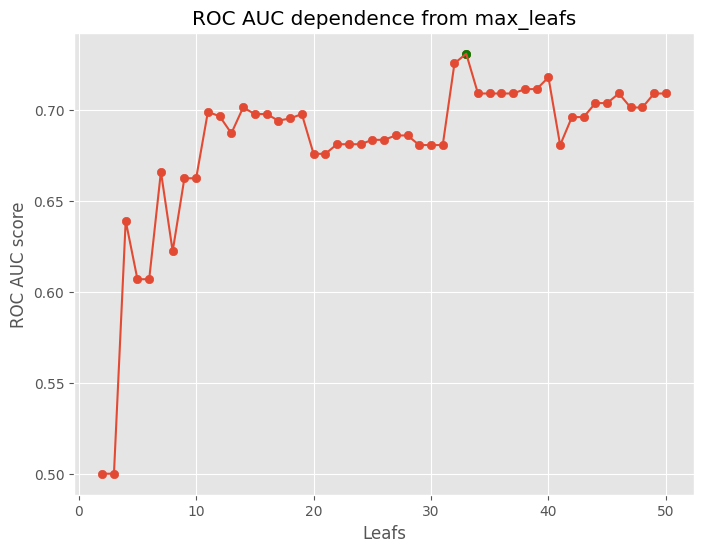

In [242]:
plt.figure(figsize=(8, 6))

plt.plot(leafs, metric_result)
plt.scatter(leafs, metric_result)
plt.scatter(optimal_leafs, optimal_val, color='green')

plt.xlabel('Leafs')
plt.ylabel('ROC AUC score')
plt.title('ROC AUC dependence from max_leafs')
plt.grid(True)
plt.show()

In [243]:
optimal_leafs

33

In [244]:
optimal_val

0.7309545875810937

In [245]:
# try to find better min_samples_leaf param
leafs = np.arange(1, 51)
metric_result = []
optimal_leafs = None
optimal_val = -float('inf')

for leaf in leafs:
    #model = DecisionTreeClassifier(min_samples_leaf=leaf, max_depth=9, max_leaf_nodes=34,
    #                   random_state=42, splitter='best', criterion='entropy', min_samples_split=8)
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    metric = roc_auc_score(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric > optimal_val:
        optimal_val = metric
        optimal_leafs = leaf

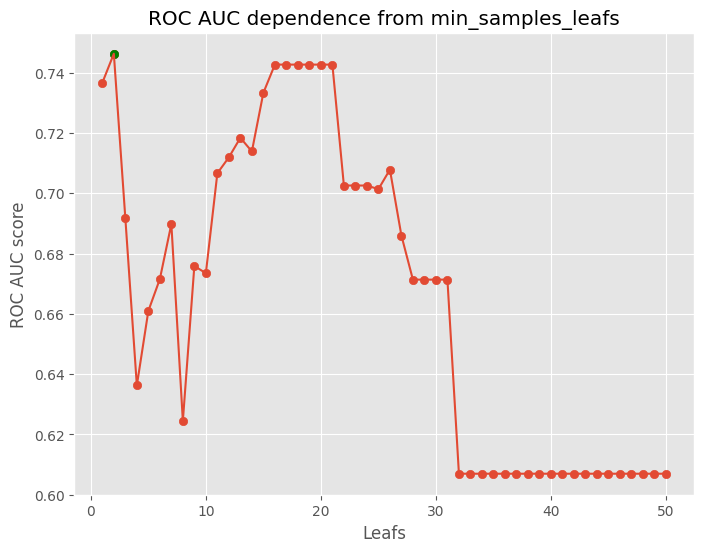

In [246]:
plt.figure(figsize=(8, 6))

plt.plot(leafs, metric_result)
plt.scatter(leafs, metric_result)
plt.scatter(optimal_leafs, optimal_val, color='green')

plt.xlabel('Leafs')
plt.ylabel('ROC AUC score')
plt.title('ROC AUC dependence from min_samples_leafs')
plt.grid(True)
plt.show()

In [247]:
optimal_leafs

2

In [248]:
optimal_val

0.746339202965709

In [250]:
# try to find better depth param
depths = np.arange(1, 51)
metric_result = []
optimal_depths = None
optimal_val = -float('inf')

for depth in depths:
    # model = DecisionTreeClassifier(min_samples_leaf=6, max_depth=depth, max_leaf_nodes=34,
    #                    random_state=42, splitter='best', criterion='entropy', min_samples_split=8)
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    metric = roc_auc_score(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric > optimal_val:
        optimal_val = metric
        optimal_depths = depth

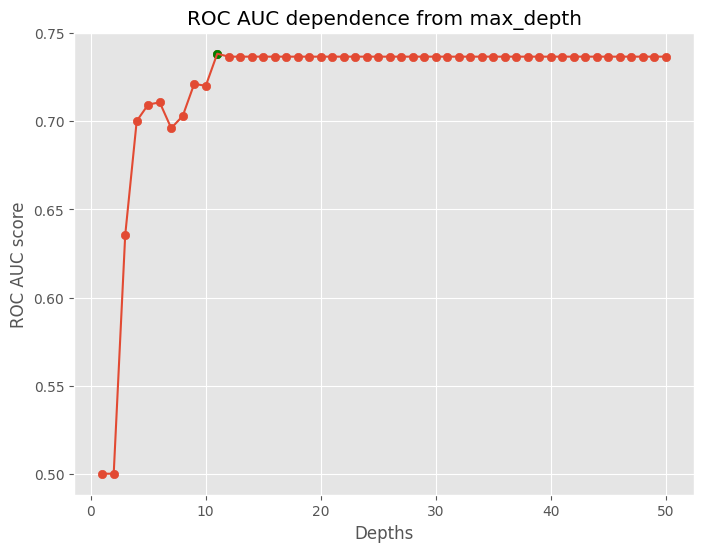

In [251]:
plt.figure(figsize=(8, 6))

plt.plot(depths, metric_result)
plt.scatter(depths, metric_result)
plt.scatter(optimal_depths, optimal_val, color='green')

plt.xlabel('Depths')
plt.ylabel('ROC AUC score')
plt.title('ROC AUC dependence from max_depth')
plt.grid(True)
plt.show()

In [252]:
optimal_depths

11

In [253]:
optimal_val

0.738368860055607

In [268]:
tuned_tree = DecisionTreeClassifier(max_depth=11, max_leaf_nodes=33, min_samples_leaf=2,
                       random_state=42, splitter='best', criterion='entropy')
tuned_tree.fit(X_train, y_train)
roc_auc_score(y_test, tuned_tree.predict(X_test))

0.734569045412419

✅Look on ROC-Curve and on class distribution.

In [269]:
fpr, tpr, threshold = roc_curve(y_test, tuned_tree.predict(X_test))

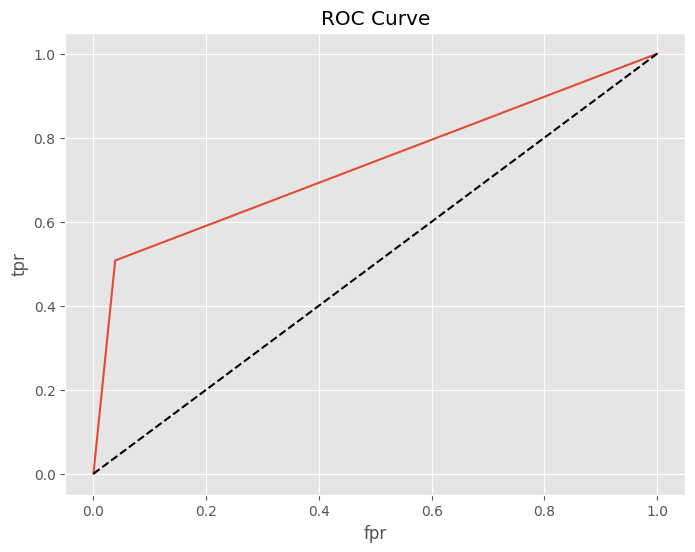

In [270]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [271]:
auc(fpr, tpr)

0.734569045412419

In [272]:
# see on most important features
pd.DataFrame(data=tree.feature_importances_, index=data_clf.columns, columns=['feature_weight']).sort_values(by=['feature_weight'])

,feature_weight
citric acid,0.000000
density,0.011944
free sulfur dioxide,0.044909
pH,0.048359
chlorides,0.048991
fixed acidity,0.053040
residual sugar,0.081701
total sulfur dioxide,0.085823
volatile acidity,0.086522
sulphates,0.145841


✅And finally - Random Forest Classificator.

In [295]:
# find best estimators
estimators_count = np.arange(1, 410, 10)
metric_result = []
optimal_estimators_count = None
optimal_val = -float('inf')

for estimators in estimators_count:
    model = RandomForestClassifier(n_estimators=estimators, max_depth=11, max_leaf_nodes=33, min_samples_leaf=2,
                       random_state=42, max_features='log2')
    model.fit(X_train, y_train)
    metric = roc_auc_score(y_test, model.predict(X_test))
    metric_result.append(metric)
    if metric > optimal_val:
        optimal_val = metric
        optimal_estimators_count = estimators

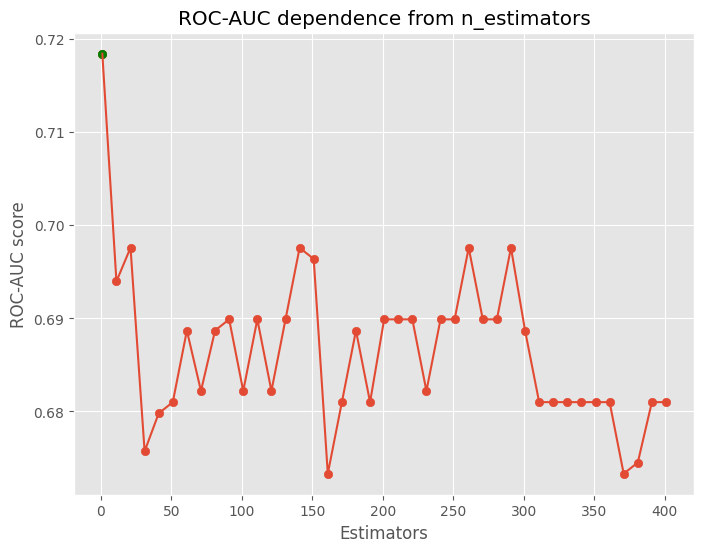

In [296]:
plt.figure(figsize=(8, 6))

plt.plot(estimators_count, metric_result)
plt.scatter(estimators_count, metric_result)
plt.scatter(optimal_estimators_count, optimal_val, color='green')

plt.xlabel('Estimators')
plt.ylabel('ROC-AUC score')
plt.title('ROC-AUC dependence from n_estimators')
plt.grid(True)
plt.show()

In [297]:
optimal_estimators_count

1

In [298]:
optimal_val

0.7184430027803522

In [299]:
forest = RandomForestClassifier(n_estimators=1, max_depth=11, max_leaf_nodes=33, min_samples_leaf=2,
                       random_state=42, max_features='log2', criterion='gini')
forest.fit(X_train, y_train)
roc_auc_score(y_test, forest.predict(X_test))

0.7184430027803522

In [300]:
fpr, tpr, threshold = roc_curve(y_test, forest.predict(X_test))

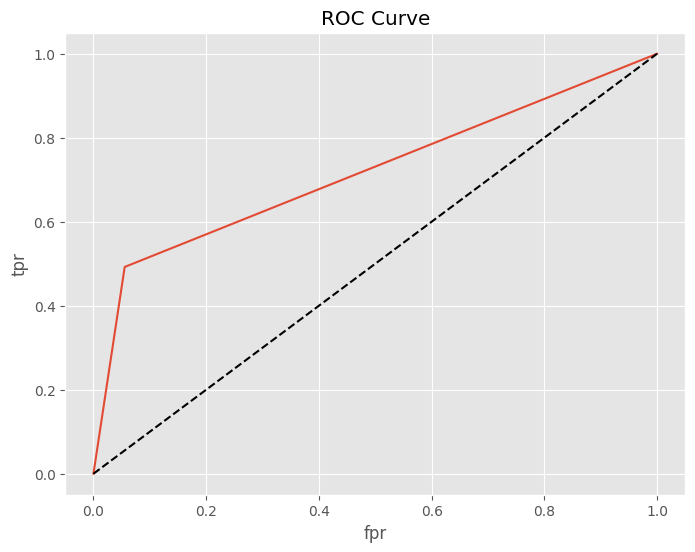

In [301]:
plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

✅Well, that is all, I guess.